# Reinforcement Learning
Author: Jin Yeom (jinyeom@utexas.edu)

In [21]:
from typing import Mapping, Tuple

import gym
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

## Q-learning

Let's begin with the **Q-learning** algorithm, which is based on the following learning rule,

$$
Q'(s_t, a_t) \leftarrow (1 - \alpha)Q(s_t, a_t) + \alpha(r_t + \gamma * \max_{a}Q(s_{t + 1}, a))
$$

In [98]:
def update_q(Q, s, a, r, s_, alpha, gamma):
    learned_value = r + gamma * np.max(Q[s_, :])
    Q[s, a] = (1 - alpha) * Q[s, a] + alpha * learned_value

In [99]:
def online_q_learning(Q, E, alpha, gamma, epsilon, n_iter, n_eps):
    reward_log = []
    for ep in range(n_eps):
        s = E.reset()
        i = total_reward = done = 0
        while not done and i < n_iter:
            # ε-greedy is applied for exploration, in which by some probability ε,
            # a random action is chosen, instead of the reward maximizing action.
            a = np.random.choice([E.action_space.sample(), np.argmax(Q[s, :])],
                                 p=[epsilon, 1 - epsilon])
            s_, r, done, _ = E.step(a)
            update_q(Q, s, a, r, s_, alpha, gamma)
            s = s_
            total_reward += r
            i += 1
        reward_log.append(total_reward)
    return reward_log

For this section, we're going to use a simple Grid World based environment called **Frozen Lake**.

In [100]:
E = gym.make("FrozenLake-v0")
print(E.observation_space)
print(E.action_space)

Discrete(16)
Discrete(4)


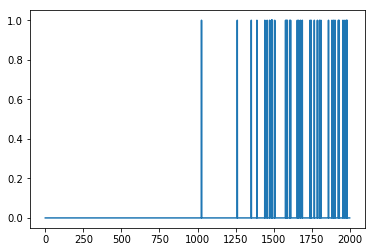

In [101]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
reward_log = online_q_learning(Q, E, 0.8, 0.95, 0.3, 100, 2000)
plt.plot(reward_log)
plt.show()